(385, 385, 3)
(385, 385, 3)
(385, 385, 3)


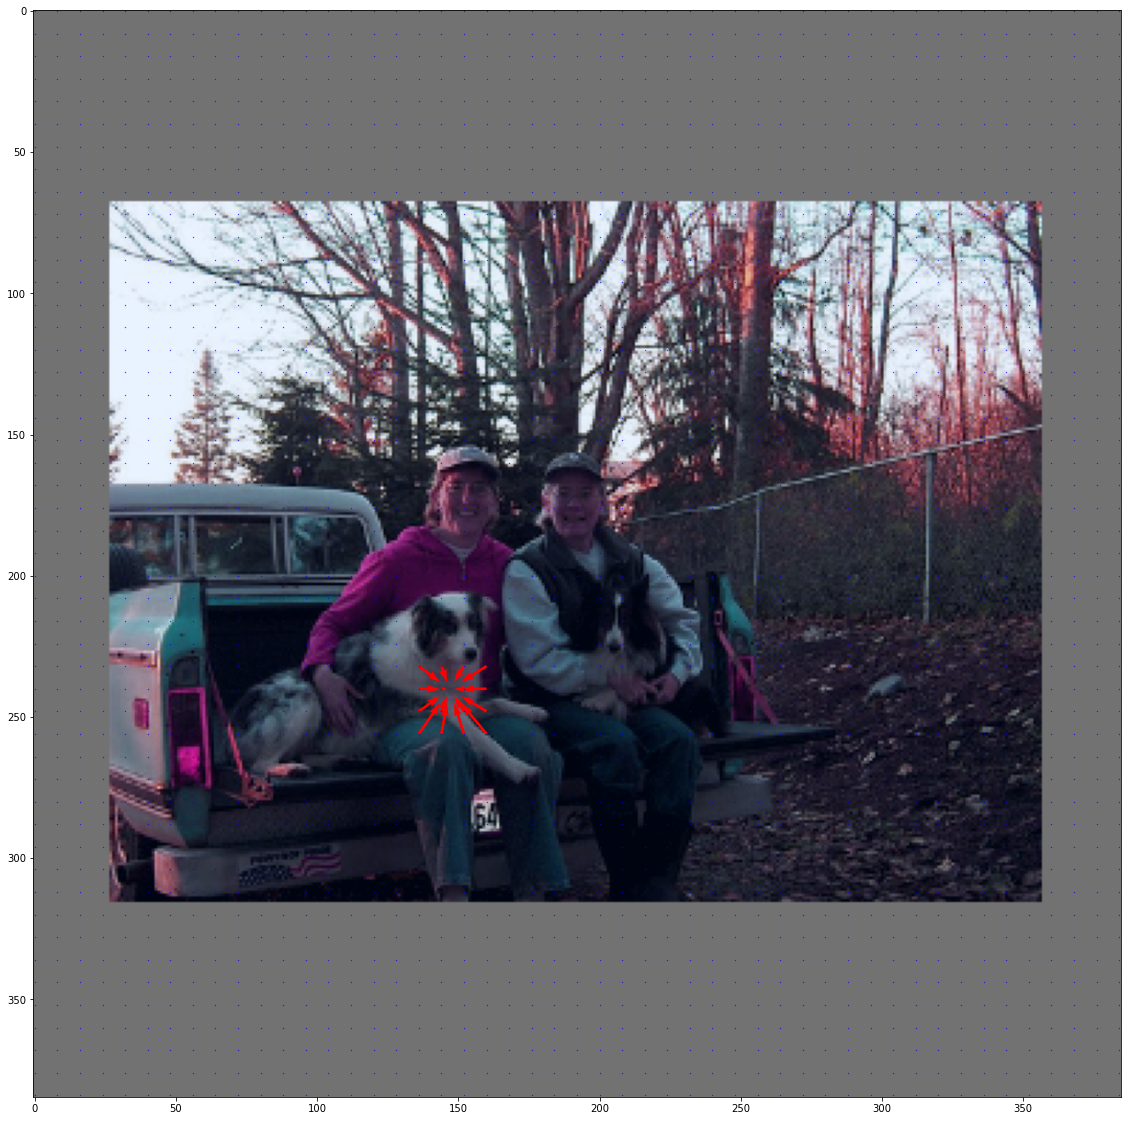

In [53]:
import pickle
import numpy as np
with open('coco.pickle', 'rb') as f:
    image, anns, meta = pickle.load(f)
    
# you have to choose the right keypoint here
y = anns[0][1][17][0] # y for keypoint 0 of image 0
x = anns[0][1][17][1] # x for keypoint 0 of image 0

import matplotlib.pyplot as plt
import cv2

# print(a[0][7].shape)

# data_transposed = np.transpose(a[0][7].numpy(),(1,2,0))
data_transposed = np.transpose(image.numpy(),(1,2,0))
print(data_transposed.shape)
# img = cv2.imread(data_transposed)
# data_transposed = cv2.resize(data_transposed, dsize=(49, 49))

image_emp_copy = (data_transposed - data_transposed.min())/(data_transposed.max()-data_transposed.min())
print(image_emp_copy.shape)
# image_emp_copy = rescale(image_emp_copy, 1.0/16, anti_aliasing=False)
print(image_emp_copy.shape)

plt.figure(figsize=(20,20))
origin = np.indices(x.shape)
origin_copy = origin.copy()
origin_copy[0] = origin[1]*8
origin_copy[1] = origin[0]*8
plt.quiver(*origin_copy, y, -x,scale=70, color='r')
plt.scatter(x=origin[0]*8, y=origin[1]*8, c='b', s=.1)


plt.imshow(image_emp_copy)



In [1]:
import pickle
import numpy as np
with open('scenes.pickle', 'rb') as f:
    scenes = pickle.load(f)

/export/home/ghasemzadeh/pifpaf_modified/deepsport_pose_emb/openpifpaf/visualizer/base.py:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Oranges"))
  matplotlib.cm.get_cmap('Oranges').set_bad('white', alpha=0.5)
/export/home/ghasemzadeh/pifpaf_modified/deepsport_pose_emb/openpifpaf/visualizer/base.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  matplotlib.cm.get_cmap('Blues').set_bad('white', alpha=0.5)
/export/home/ghasemzadeh/pifpaf_modified/deepsport_pose_emb/openpifpaf/visualizer/base.py:14: MatplotlibDeprecat

In [2]:
data, target, meta = next(iter(scenes))

In [3]:
print('Number of heads: ', len(target))
print('Number of fields in PIF: ', len(target[0]))
print('Number of fields in PAN: ', len(target[1]))
print('Batch size: ', len(target[0][0]))

Number of heads:  2
Number of fields in PIF:  3
Number of fields in PAN:  4
Batch size:  4


In [6]:
data_in_batch = 1

<function matplotlib.pyplot.show(close=None, block=None)>

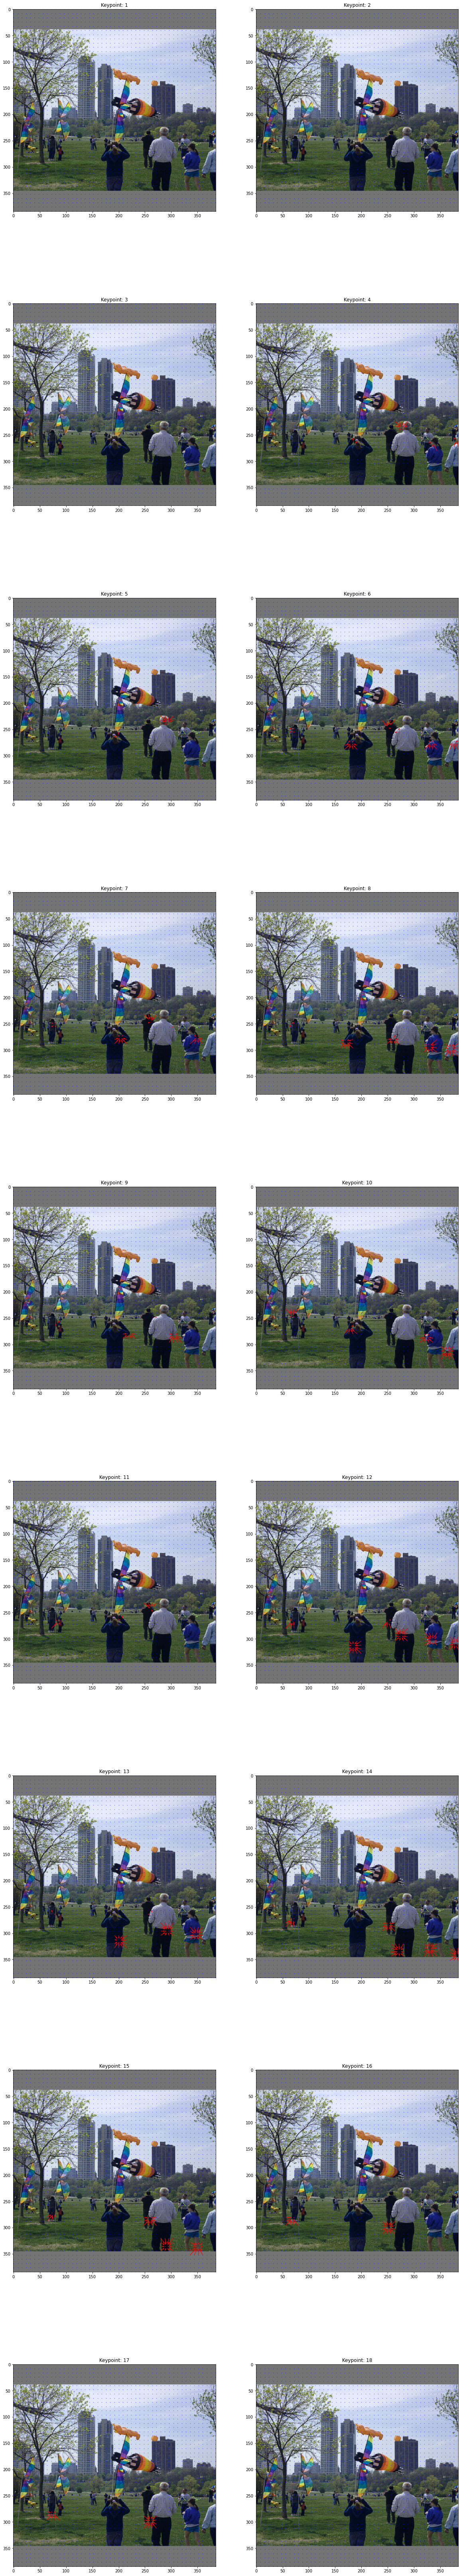

In [7]:

#####################
# visualize PIF Vectors
#####################


import matplotlib.pyplot as plt
# print(data.shape)
# fig, ax = plt.subplots(9,2)
image = np.transpose(data[data_in_batch].numpy(),(1,2,0))
image = (image - image.min())/(image.max() - image.min())
# plt.imshow(image)
axes = []
fig = plt.figure(figsize=(20,120))
for i in range(18):
    axes.append(fig.add_subplot(9, 2, i+1))
    subplot_title = ('Keypoint: '+ str(i+1))
    axes[-1].set_title(subplot_title)
    
    y = target[0][1][data_in_batch][i][0]
    x = target[0][1][data_in_batch][i][1]
    
    origin = np.indices(x.shape)
    origin_copy = origin.copy()
    origin_copy[0] = origin[1]*8
    origin_copy[1] = origin[0]*8
    plt.quiver(*origin_copy, y, -x,scale=70, color='r')
    plt.scatter(x=origin[0]*8, y=origin[1]*8, c='b', s=.1)
    
    confidence = target[0][0][data_in_batch][i]
#     plt.scatter(x=confidence[0]*8, y=confidence[1]*8, c='b', s=.1)
    
    plt.imshow(image)
    
plt.show




In [ ]:
print(target[1]['semantic'].shape)
print(target[1]['offset'].shape)

In [2]:

#####################
# visualize PAN 
#####################


import matplotlib.pyplot as plt
import copy
# print(data.shape)
# fig, ax = plt.subplots(9,2)
image = np.transpose(data[data_in_batch].numpy(),(1,2,0))
image = (image - image.min())/(image.max() - image.min())
# plt.imshow(image)
axes = []
fig = plt.figure(figsize=(20,120))
mmm = copy.deepcopy(target[1]['semantic'][data_in_batch])
# mmm[50,50] = 1
mmm[0:385:100, 0:385:100] = 1
for i in range(1):
    axes.append(fig.add_subplot(1, 1, i+1))
#     subplot_title = ('Keypoint: '+ str(i+1))
#     axes[-1].set_title(subplot_title)
    
    y = target[1]['offset'][data_in_batch][0] * mmm
    x = target[1]['offset'][data_in_batch][1] * mmm
    
    origin = np.indices(x.shape)
    origin_copy = origin.copy()
    origin_copy[0] = origin[1]
    origin_copy[1] = origin[0]
    plt.quiver(*origin_copy, x, -y, scale=500, color='r', alpha=1)
#     plt.scatter(x=origin[0], y=origin[1], c='b', s=.8)
    
#     confidence = target[0][0][data_in_batch][i]
#     plt.scatter(x=confidence[0]*8, y=confidence[1]*8, c='b', s=.1)
    semantic = target[1]['semantic'][data_in_batch]
#     plt.imshow(semantic, alpha=.7)
    
    plt.imshow(image, alpha=.5)
    
plt.show




NameError: name 'data' is not defined

In [7]:
semantic = target[1]['semantic'][data_in_batch]
print(semantic.max())

tensor(1)
